# Python-13. Визуализация данных 

## 9. Закрепление знаний

In [1]:
import numpy as np
import pandas as pd
rng = np.random.default_rng(seed=12345)
np.set_printoptions(suppress=True, precision=2)
pd.options.display.float_format = '{:,.2f}'.format

import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

In [2]:
df = pd.read_csv('data/churn.csv')
df['Exited_'] = df['Exited'].apply(lambda x: 'Existing' if x==0 else 'Left')
df[['HasCrCard_', 'IsActiveMember_']] = df[['HasCrCard', 'IsActiveMember']].applymap(lambda x: 'Yes' if x==1 else 'No')
df[['Exited_', 'Geography', 'Gender', 'HasCrCard_', 'IsActiveMember_']] = df[['Exited_', 'Geography', 'Gender', 'HasCrCard_', 'IsActiveMember_']].astype('category')

- RowNumber: corresponds to the record (row) number and has no effect on the output.
- CustomerId: contains random values and has no effect on customer leaving the bank.
- Surname: the surname of a customer has no impact on their decision to leave the bank.
- CreditScore: can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
- Geography: a customer’s location can affect their decision to leave the bank.
- Gender: it’s interesting to explore whether gender plays a role in a customer leaving the bank.
- Age: this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
- Tenure: refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
- Balance: also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
- NumOfProducts: refers to the number of products that a customer has purchased through the bank.
- HasCrCard: denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
- IsActiveMember: active customers are less likely to leave the bank.
- EstimatedSalary: as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
- Exited: whether or not the customer left the bank.

In [3]:
pd.concat([df.head(), df.tail()])

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Exited_,HasCrCard_,IsActiveMember_
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,"101,348.88",1,Left,Yes,Yes
1,2,15647311,Hill,608,Spain,Female,41,1,"83,807.86",1,0,1,"112,542.58",0,Existing,No,Yes
2,3,15619304,Onio,502,France,Female,42,8,"159,660.80",3,1,0,"113,931.57",1,Left,Yes,No
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,"93,826.63",0,Existing,No,No
4,5,15737888,Mitchell,850,Spain,Female,43,2,"125,510.82",1,1,1,"79,084.10",0,Existing,Yes,Yes
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,"96,270.64",0,Existing,Yes,No
9996,9997,15569892,Johnstone,516,France,Male,35,10,"57,369.61",1,1,1,"101,699.77",0,Existing,Yes,Yes
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,"42,085.58",1,Left,No,Yes
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,"75,075.31",2,1,0,"92,888.52",1,Left,Yes,No
9999,10000,15628319,Walker,792,France,Female,28,4,"130,142.79",1,1,0,"38,190.78",0,Existing,Yes,No


In [4]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   RowNumber        10000 non-null  int64   
 1   CustomerId       10000 non-null  int64   
 2   Surname          10000 non-null  object  
 3   CreditScore      10000 non-null  int64   
 4   Geography        10000 non-null  category
 5   Gender           10000 non-null  category
 6   Age              10000 non-null  int64   
 7   Tenure           10000 non-null  int64   
 8   Balance          10000 non-null  float64 
 9   NumOfProducts    10000 non-null  int64   
 10  HasCrCard        10000 non-null  int64   
 11  IsActiveMember   10000 non-null  int64   
 12  EstimatedSalary  10000 non-null  float64 
 13  Exited           10000 non-null  int64   
 14  Exited_          10000 non-null  category
 15  HasCrCard_       10000 non-null  category
 16  IsActiveMember_  10000 non-null  category

**Задание 9.1.**  
Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

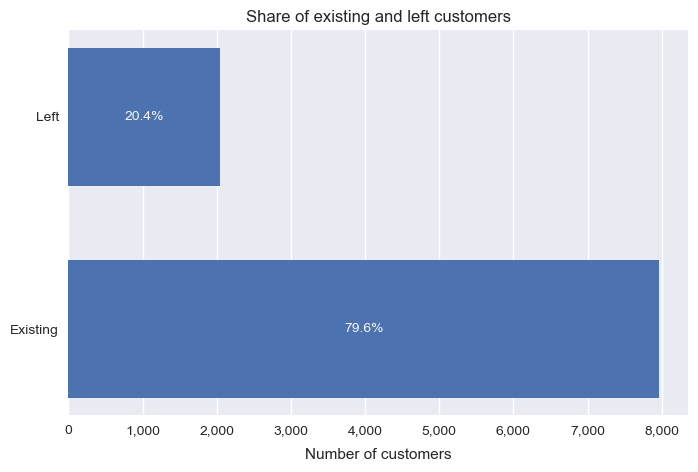

In [5]:
labels = df['Exited_'].value_counts().index.to_list()
counts = df['Exited_'].value_counts().to_list()

fig, ax = plt.subplots(figsize=(8, 5))
barc = ax.barh(labels, width=counts, height=0.65)
ax.set_title('Share of existing and left customers')
ax.set_xlabel('Number of customers', labelpad=8)
ax.grid(False, axis='y')
ax.bar_label(barc, label_type='center', labels=[f'{x/np.sum(counts):.1%}' for x in counts], color='whitesmoke')
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

*Ответ*  
На текущий момент банк потерял каждого пятого клиента, который сотрудничал с банком.

**Задание 9.2**  
Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

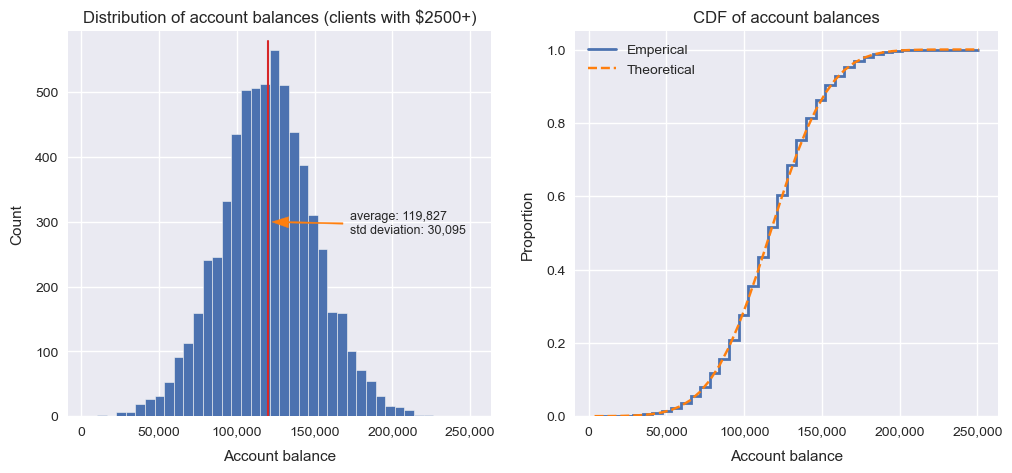

In [6]:
ser_balances = df.loc[df['Balance'] > 2500, 'Balance']
mu = ser_balances.mean()
sigma = ser_balances.std()

n, bins = np.histogram(ser_balances.to_numpy(), bins=40)
n = np.cumsum(n/np.sum(n))
n_theoretical = np.cumsum((1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
n_theoretical /= n_theoretical[-1]

fig, (ax1, ax2)= plt.subplots(1, 2, figsize=(12, 5))
ax1.hist(ser_balances, bins=40, stacked=True, edgecolor='whitesmoke', linewidth=0.4)
ax1.set_title('Distribution of account balances (clients with $2500+)')
ax1.set_xlabel('Account balance', labelpad=8)
ax1.set_ylabel('Count', labelpad=8)
ax1.axvline(mu, ymax=0.975, color = 'tab:red', linewidth=1.5)
ax1.annotate(f'average: {mu:,.0f}\nstd deviation: {sigma:,.0f}', (mu, 300), xytext=(2/3, 1/2), textcoords='axes fraction', 
    fontsize=9, arrowprops=dict(width=1, headwidth=8, shrink=0.05, color='tab:orange'),
    horizontalalignment='left', verticalalignment='center')
ax1.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

ax2.stairs(n, bins, linewidth=2, baseline=None, label='Emperical')
ax2.plot(bins, n_theoretical, linestyle='dashed', color='tab:orange', label='Theoretical')
ax2.set_title('CDF of account balances');
ax2.set_xlabel('Account balance', labelpad=8)
ax2.set_ylabel('Proportion', labelpad=8)
ax2.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax2.legend();

*Ответ*  
У клиентов, имеющих на балансе более 2,500 долларов, размер среднего счета составляет около 120 тыс. долларов. При этом стандартное отклонение от среднего размера счета практически идеально следует нормальному распределению. То есть, при значении среднеквадратического отклонения равному 30 тыс. долларов, примерно у 95% клиентов баланс попадает в диапазон от 60 до 180 тыс. долларов.

**Задание 9.3**  
Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

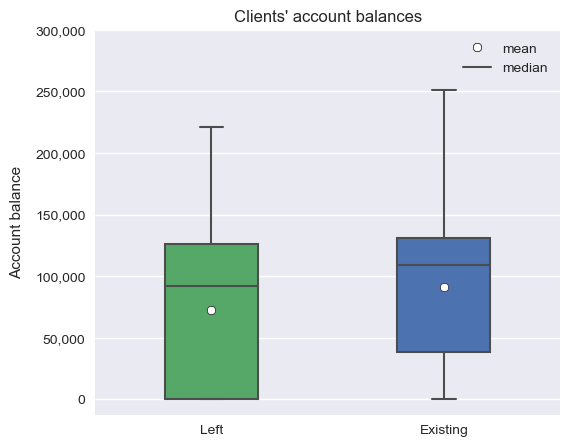

In [7]:
existing = df.loc[df['Exited_'] == 'Existing', 'Balance']
left = df.loc[df['Exited_'] == 'Left', 'Balance']

fig, ax = plt.subplots(figsize=(6, 5))
bp = ax.boxplot([existing, left], widths=0.4, patch_artist=True, labels=labels[::-1], showmeans=True, 
    boxprops={'facecolor': 'C0', 'edgecolor': '#4C4D4E', 'linewidth': 1.5},
    capprops={'color': '#4C4D4E', 'linewidth': 1.5},
    whiskerprops={'color': '#4C4D4E', 'linewidth': 1.5}, 
    medianprops={'color': '#4C4D4E', 'linewidth': 1.5}, 
    meanprops={'marker':'8', 'markerfacecolor':'w', 'markeredgecolor':'#4C4D4E', 'markeredgewidth':0.75}    
    )
ax.set_title('Clients\' account balances');
ax.set_ylabel('Account balance', labelpad=8)
ax.grid(False, axis='x')
ax.set_ylim(top=300_000)
ax.legend([bp['means'][0], bp['medians'][0]], ['mean', 'median'])
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

colors = ['#55A868', '#4C72B0']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
for cap in bp['caps']:
    cap.set_xdata(cap.get_xdata() + np.array([0.05, -0.05]))

*Ответ*  
Размер среднего и медианного счета у лояльных клиентов превышает значение, которое наблюдается у ушедших клиентов. Одной из отличительных особенностей между двумя группами является 

**Задание 9.4**  
Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

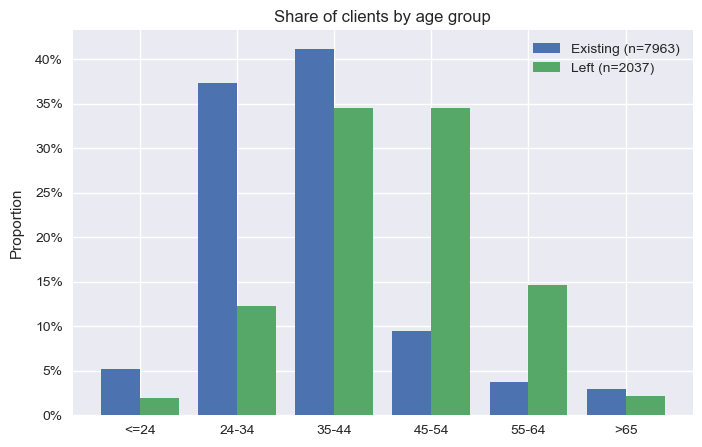

In [8]:
age_groups = ['<=24', '24-34', '35-44', '45-54', '55-64', '>65']
df['Age_'] = pd.cut(df['Age'], bins=[0, 24, 34, 44, 54, 64, 100], include_lowest=True, labels=age_groups)

ages_exited = df.groupby(['Age_', 'Exited_'])['RowNumber'].count().reset_index()
existing = ages_exited.loc[ages_exited['Exited_'] == 'Existing', 'RowNumber']
existing = existing/np.sum(existing)
left = ages_exited.loc[ages_exited['Exited_'] == 'Left', 'RowNumber']
left = left/np.sum(left)

fig, ax = plt.subplots(figsize=(8, 5))
x = np.arange(len(age_groups))
rects1 = ax.bar(x-0.4/2, existing, 0.4, label=f'{labels[0]} (n={counts[0]})')
rects2 = ax.bar(x+0.4/2, left, 0.4, label=f'{labels[1]} (n={counts[1]})')
ax.set_title('Share of clients by age group');
ax.set_ylabel('Proportion', labelpad=8)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0%}'))
ax.set_xticks(x, age_groups)
ax.legend();

*Ответ*  
Среди действующих клиентов треть является молодежью и молодыми взрослыми, возрастом до 34 лет включительно. Еще треть клиентов относится к следующей возрастной категории людей от 35 до 44 лет включительно. Обратная картина наблюдается среди ушедших клиентов, средний возраст которых составляет 44,9 лет (на 7,4 лет больше, чем у действующих клиентов). Особенно ярко заметен отток клиентов в возрастных группах 45-54 и 55-64, в которых диспропорционально много клиентов покидает банк.

**Задание 9.5**  
Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

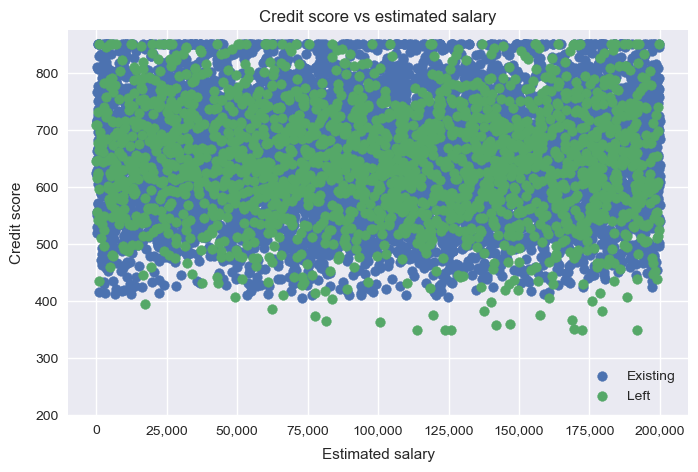

In [9]:
existing = df.loc[df['Exited_'] == 'Existing', ['CreditScore', 'EstimatedSalary']]
left = df.loc[df['Exited_'] == 'Left', ['CreditScore', 'EstimatedSalary']]

fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(existing['EstimatedSalary'], existing['CreditScore'], label=labels[0])
ax.scatter(left['EstimatedSalary'], left['CreditScore'], label=labels[1])
ax.set_title('Credit score vs estimated salary');
ax.set_xlabel('Estimated salary', labelpad=8)
ax.set_ylabel('Credit score', labelpad=8)
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_ylim(bottom=200)
ax.legend(loc='lower right');

*Ответ*  
Прямой зависимости между остатком на счете клиента и присвоенном ему кредитным рейтингом отсутствует. При любом балансе кредитный рейтинг варьируется в диапазоне от 400 до 850 баллов.

**Задание 9.6**  
Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

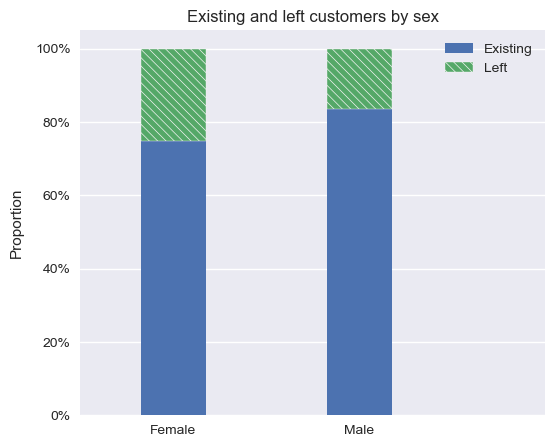

In [10]:
gender = df.groupby('Gender')['Exited'].mean().to_numpy()
gender_labels = df.groupby('Gender')['Exited'].mean().index.to_list()
gender_left = df.groupby('Gender')['Exited'].mean().to_numpy()
gender_existing = 1 - gender_left

fig, ax = plt.subplots(figsize=(6, 5))
mpl.rcParams['hatch.linewidth'] = 0.5
ax.bar(gender_labels, gender_existing, width=0.35, label=labels[0])
ax.bar(gender_labels, gender_left, width=0.35, label=labels[1], bottom=gender_existing, hatch='\\\\\\\\', edgecolor='whitesmoke')
ax.set_title('Existing and left customers by sex');
ax.set_ylabel('Proportion', labelpad=8)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0%}'))
ax.legend(loc='upper right')
ax.set_xlim(right=2, left=-0.5)
ax.grid(False, axis='x')

*Ответ*  
В относительном выражении клиенты женского пола чаще перестают пользоваться услугами банка (25% женщин против 16% мужчин).

**Задание 9.7**  
Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

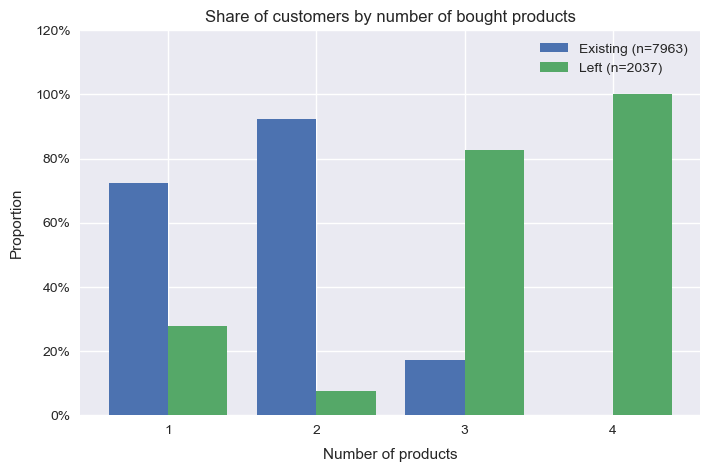

In [11]:
products_num = df.groupby(['NumOfProducts', 'Exited_'])['RowNumber'].count().reset_index()
products_labels = products_num['NumOfProducts'].unique()
products_all = products_num.groupby('NumOfProducts')['RowNumber'].sum().to_numpy()
products_existing = products_num.loc[products_num['Exited_'] == 'Existing', 'RowNumber'].to_numpy() / products_all
products_left = products_num.loc[products_num['Exited_'] == 'Left', 'RowNumber'].to_numpy() / products_all

fig, ax = plt.subplots(figsize=(8, 5))
x = np.arange(len(products_labels))
rects1 = ax.bar(x-0.4/2, products_existing, 0.4, label=f'{labels[0]} (n={counts[0]})')
rects2 = ax.bar(x+0.4/2, products_left, 0.4, label=f'{labels[1]} (n={counts[1]})')
ax.set_title('Share of customers by number of bought products');
ax.set_xlabel('Number of products', labelpad=8)
ax.set_ylabel('Proportion', labelpad=8)
ax.set_ylim(top=1.2)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0%}'))
ax.set_xticks(x, products_labels)
ax.legend(loc='upper right');

*Ответ*  
По банку в целом уровень оттока клиентов составляет 20,4%. Для клиентов, которые приобрели только один продукт данный показатель составляет 28%, два продукта -- лишь 8%. То есть при подключении второго банковского продукта (например: карты и вклады) процент оттока снижается и находится на приемлемом уровне. Число клиентов, которые пробуют дополнительные услуги, относительно невелико и составляет всего 326 человек. Для данных клиентов процент оттока составляет более 80%, что является катастрофичным для бизнеса в долгосрочной перспективе. Общей рекомендацией будет пересмотр дополнительных продуктов, их условий, а так же стандартов и регламентов их предоставления для удержания клиентов.

**Задание 9.8**  
Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

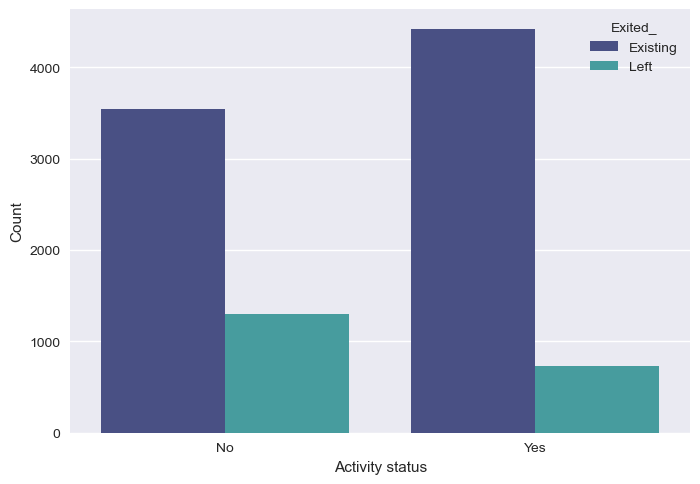

In [12]:
import seaborn as sns
status = pd.pivot_table(df[['RowNumber', 'IsActiveMember_', 'Exited_']], values='RowNumber', index=['IsActiveMember_', 'Exited_'],  aggfunc='count').reset_index()

ax = sns.barplot(data=status, x='IsActiveMember_', y='RowNumber', hue='Exited_', palette='mako')
ax.set_xlabel('Activity status')
ax.set_ylabel('Count');

*Ответ*  
Смотря на абсолютное количество клиентов в разрезе статуса активности и лояльности, можно сделать вывод о том, что активные клиенты реже отказываются от услуг банка. Одним из инструментов снижения уровня оттока клиентов могут выступать мероприятия, направленные на активизацию вовлеченности клиентов в совершении банковских операций.

**Задание 9.9**  
В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [13]:
import plotly
import plotly.express as px
geodf = df.groupby('Geography')['Exited'].mean().reset_index()
geodf['Exited'] = np.round(geodf['Exited']*100, 2)

fig = px.choropleth(data_frame=geodf, color='Exited', locations='Geography', locationmode='country names', projection='natural earth', scope='europe', range_color=[0, 1.2 * geodf['Exited'].max()],
                    title='Customer churn rate by country', width=650, height=650, template='gridon')
fig.show()
fig.write_html("images/map.html")

*Ответ*  
Наибольший уровень оттока клиентов наблюдается в Германии (около 32%), наименьший - на уровне 16% - во Франции и Испании. Такая разница в успехе в разных странах может объясняться различиями в структуре банковских систем в рассматриваемых странах (концентрация в секторе, преобладание одних или других видов финансовых организаций), подходах надзорных органов к управлению, которые сформировали соответствующие ожидания потребителей. Вероятно, в некоторых странах банк не в полной мере отвечает запросам клиентов.

**Задание 9.10**  
Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.
```
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
```
Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

In [14]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

In [15]:
df['CreditScoreCat'] = df['CreditScore'].apply(get_credit_score_cat)
pvt = pd.pivot_table(df, values='Exited', index='CreditScoreCat', columns='Tenure')

fig, ax = plt.subplots(figsize=(15, 5))
im = ax.imshow(pvt.to_numpy(), cmap='viridis')
ax.set_xticks(np.arange(len(pvt.columns)), labels=pvt.columns)
ax.set_yticks(np.arange(len(pvt.index)), labels=pvt.index)

ax.set_title("Clients\' churn rate by credit rating and tenure")
ax.set_xlabel('Years', labelpad=8)
ax.set_ylabel('Credit rating', labelpad=8)
ax.grid(False)
for i in range(len(pvt.index)):
    for j in range(len(pvt.columns)):
        text = ax.text(j, i, f'{pvt.to_numpy()[i, j]:,.2f}', ha="center", va="center", color='#4C4D4E' if im.norm(pvt.to_numpy()[i, j]) > im.norm(pvt.to_numpy().max())/1.5 else 'whitesmoke')
cbar = ax.figure.colorbar(im, ax=ax)
plt.savefig('images\\heatmap.png', bbox_inches='tight')
plt.close()

![Heatmap](images/heatmap.png)

*Ответ*  
Чаще всего банк покидают клиенты, которые были с банком менее одного года и отличным и очень низким кредитным рейтингом.